DL Lab - Practical 3 

Image Reconstruction using PCA

Aashi Khanna 

In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [27]:
my_image = imread("image.jpg")
print(my_image.shape)

(268, 178, 3)


(268, 178)


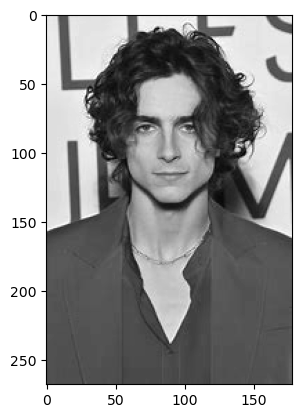

In [25]:
#Processing the image
#greyscaling the image
image_sum = my_image.sum(axis=2)
print(image_sum.shape)
plt.imshow(new_image, cmap=plt.cm.gray)

In [ ]:
#creating scree plot 
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(new_image)

Number of components explaining 95% variance: 18


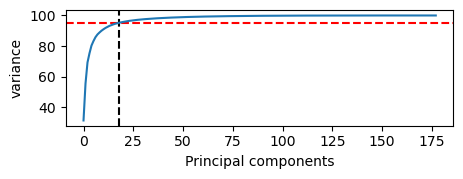

In [26]:
# Getting the cumulative variance 
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
 
plt.figure(figsize=[5,1.5])
plt.ylabel('variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

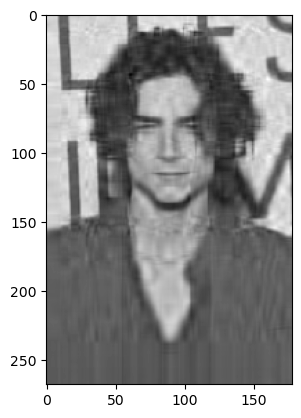

In [13]:
#Reconstructing using Inverse Transform
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(new_image))
 
# Plotting the reconstructed image
plt.figure()
plt.imshow(image_recon,cmap = plt.cm.gray)

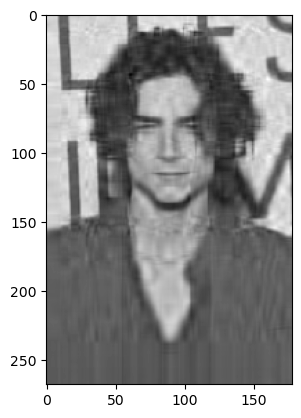

In [15]:
# Function to reconstruct and plot image for a given number of components
 
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(new_image))
    plt.imshow(image_recon,cmap = plt.cm.gray)

k = 18
plt.figure()
plot_at_k(18)

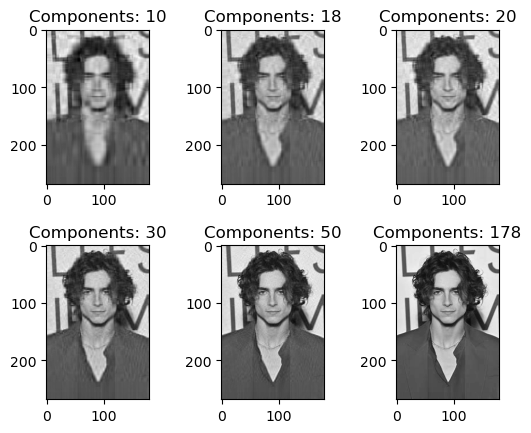

In [17]:
#setting different amounts of K
ks = [10, 18, 20, 30, 50, 178] 
plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()